<a href="https://colab.research.google.com/github/Chandu0444/Machine_learning/blob/main/walmart_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement 1:
A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply.

You are provided with the weekly sales data for their various outlets. Use statistical analysis, EDA, outlier analysis, and handle the missing values to come up with various insights that can give them a clear perspective on the following:

a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

b. If the weekly sales show a seasonal trend, when and what could be the reason?

c. Does temperature affect the weekly sales in any manner?

d. How is the Consumer Price index affecting the weekly sales of various stores?

e. Top performing stores according to the historical data.

f. The worst performing store, and how significant is the difference between the
highest and lowest performing stores.

2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [206]:
data=pd.read_csv('/content/Walmart DataSet.csv')
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [208]:
data.shape

(6435, 8)

In [209]:
data.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [210]:
data.duplicated().sum()

np.int64(0)

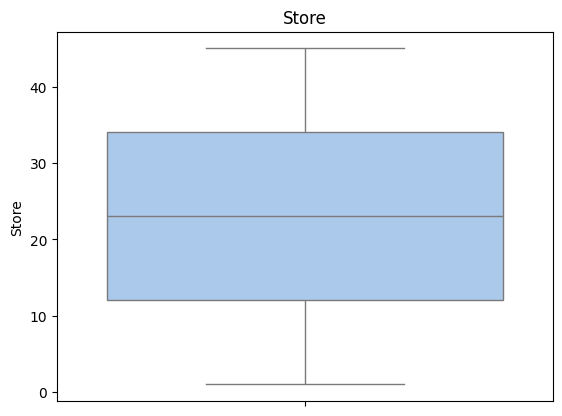

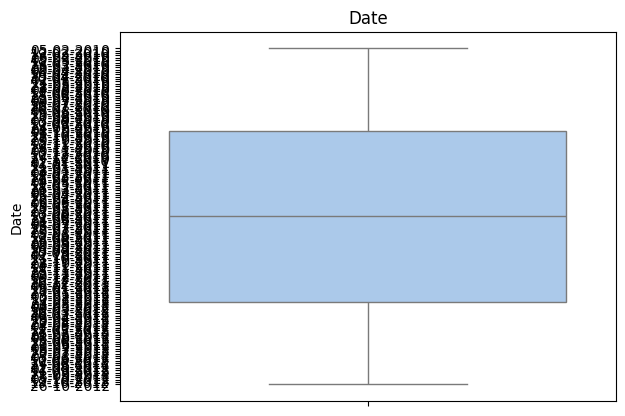

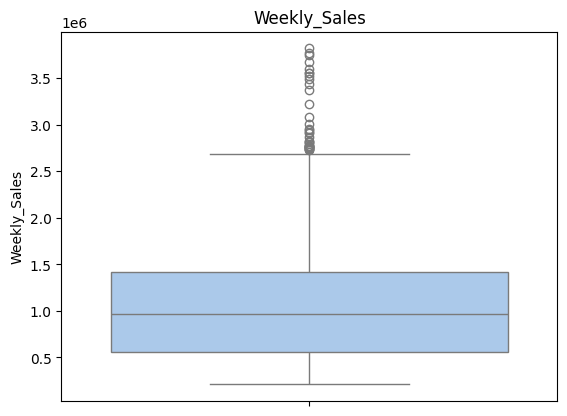

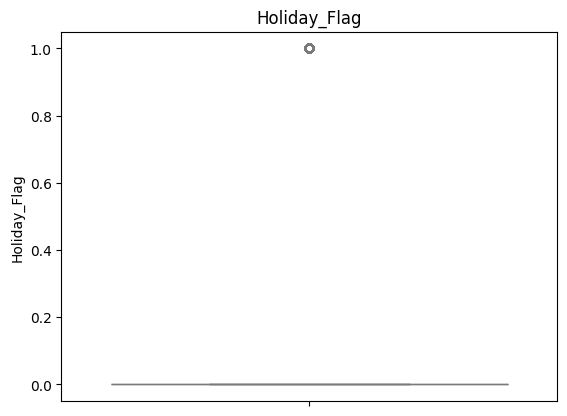

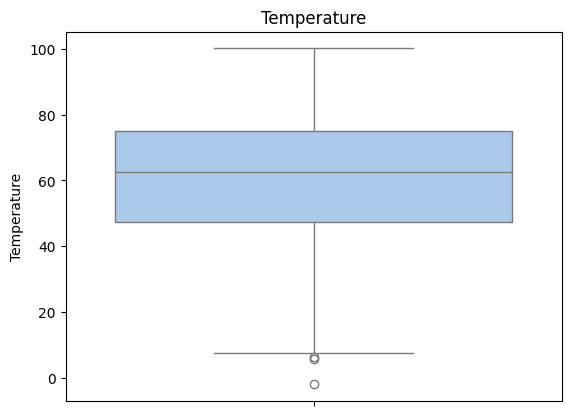

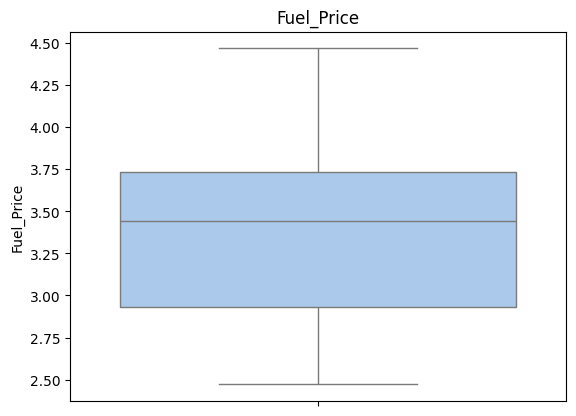

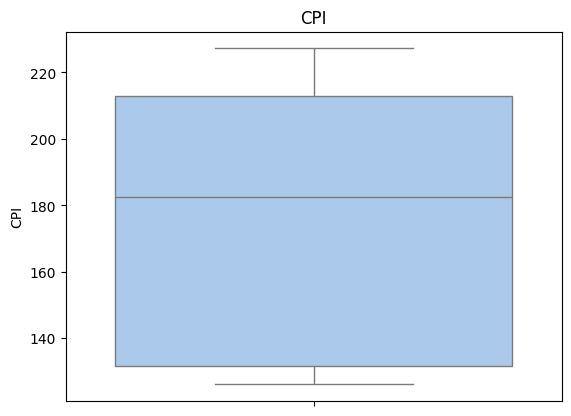

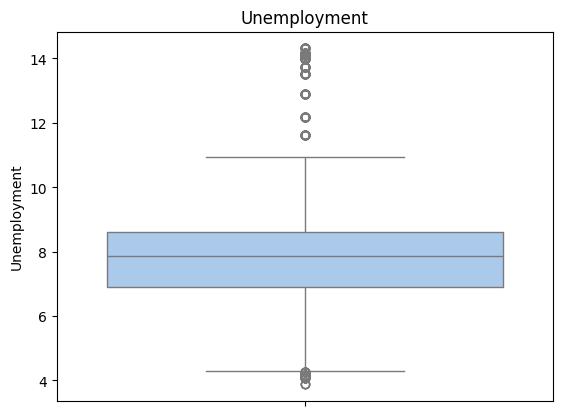

In [211]:
for col in data.columns:
  sns.boxplot(data[col])
  plt.title(col)
  plt.show()

In [212]:
#weekly sales, tempearture, unemployement
out_cols=['Weekly_Sales','Temperature','Unemployment']
for col in out_cols:
  q1=data[col].quantile(0.25)
  q3=data[col].quantile(0.75)
  iq3=q3-q1
  lb=q1-iq3*(1.5)
  ub=q3+iq3*(1.5)
  data=data[(data[col]>=lb) & (data[col]<=ub)]

In [213]:
from sklearn.preprocessing import *

In [214]:
from sklearn.preprocessing import LabelEncoder

In [215]:
le = LabelEncoder()

In [216]:
data['Date'] = le.fit_transform(data['Date'])

In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5917 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         5917 non-null   int64  
 1   Date          5917 non-null   int64  
 2   Weekly_Sales  5917 non-null   float64
 3   Holiday_Flag  5917 non-null   int64  
 4   Temperature   5917 non-null   float64
 5   Fuel_Price    5917 non-null   float64
 6   CPI           5917 non-null   float64
 7   Unemployment  5917 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 416.0 KB


In [218]:
corr = data[['Weekly_Sales','Unemployment']].corr()
corr

,Weekly_Sales,Unemployment
Weekly_Sales,1.000000,-0.073092
Unemployment,-0.073092,1.000000


In [219]:
store_unemployment = data.groupby('Store')[['Weekly_Sales','Unemployment']].corr().iloc[0::2,-1]
store_unemployment.sort_values().head()

,,Unemployment
Store,,
44,Weekly_Sales,-0.780076
4,Weekly_Sales,-0.633422
13,Weekly_Sales,-0.400254
39,Weekly_Sales,-0.384681
42,Weekly_Sales,-0.356355


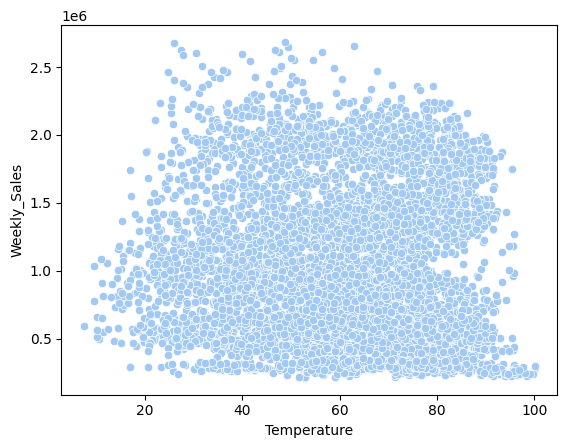

In [220]:
sns.scatterplot(x='Temperature' , y = 'Weekly_Sales', data = data)
plt.show()

In [221]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

Temperature has minimal effect

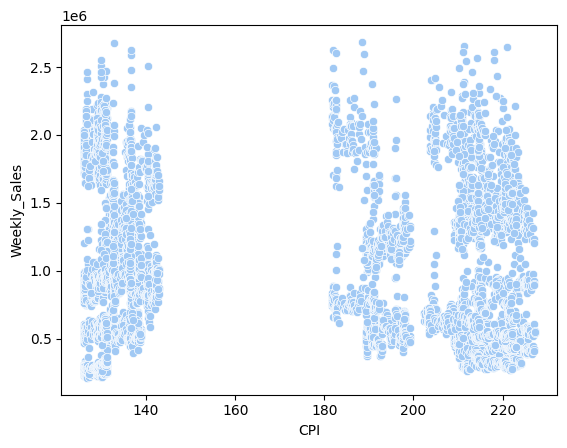

In [222]:
sns.scatterplot(x='CPI' , y = 'Weekly_Sales', data = data)
plt.show()

CPI negatively impacts sales

Higher inflation → reduced purchasing power

In [223]:
top_stores = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
top_stores.head()

,Weekly_Sales
Store,
20,2.800237e+08
14,2.761276e+08
2,2.687221e+08
13,2.682025e+08
10,2.556789e+08


In [224]:
data.set_index('Date', inplace=True)
store_22 = data[data.Store == 22]
sales_22 = pd.DataFrame(store_22.Weekly_Sales.groupby(store_22.index).sum())
sales_22.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 0 to 142
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  143 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


In [225]:
sales_22.reset_index(inplace= True)
sales_22['Date']=pd.to_datetime(sales_22['Date'])
sales_22.set_index('Date',inplace=True)
sales_22.head()

,Weekly_Sales
Date,
1970-01-01 00:00:00.000000000,951588.37
1970-01-01 00:00:00.000000001,1102857.37
1970-01-01 00:00:00.000000002,1077491.68
1970-01-01 00:00:00.000000003,905987.17
1970-01-01 00:00:00.000000004,974866.65


In [226]:
sales_22.head()

,Weekly_Sales
Date,
1970-01-01 00:00:00.000000000,951588.37
1970-01-01 00:00:00.000000001,1102857.37
1970-01-01 00:00:00.000000002,1077491.68
1970-01-01 00:00:00.000000003,905987.17
1970-01-01 00:00:00.000000004,974866.65


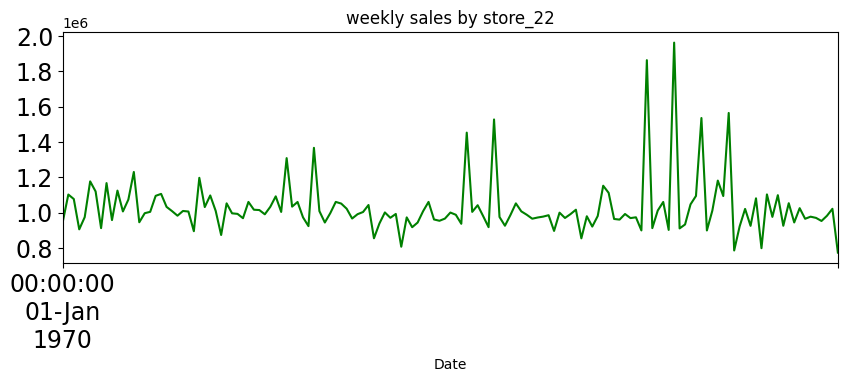

In [227]:
sales_22.Weekly_Sales.plot(figsize=(10,3),title='weekly sales by store_22',
                           fontsize=17,color='green')
plt.show()

In [228]:
store_10 = data[data.Store==10]
sales_10 = pd.DataFrame(store_10.Weekly_Sales.groupby(store_10.index).sum())

#resetting index
sales_10.reset_index(inplace = True)

#change date datatype to datetime
sales_10['Date']=pd.to_datetime(sales_10['Date'])

#set date as index
sales_10.set_index('Date', inplace = True)
sales_10.head()

,Weekly_Sales
Date,
1970-01-01 00:00:00.000000000,1827733.18
1970-01-01 00:00:00.000000001,1767471.48
1970-01-01 00:00:00.000000002,1751369.75
1970-01-01 00:00:00.000000003,1645892.97
1970-01-01 00:00:00.000000004,1990371.02


In [229]:
y1 = sales_22.Weekly_Sales
y2 = sales_10.Weekly_Sales

In [230]:
#!pip install prophet
#!pip install cmdstanpy

In [231]:
sales_22.head()

,Weekly_Sales
Date,
1970-01-01 00:00:00.000000000,951588.37
1970-01-01 00:00:00.000000001,1102857.37
1970-01-01 00:00:00.000000002,1077491.68
1970-01-01 00:00:00.000000003,905987.17
1970-01-01 00:00:00.000000004,974866.65


In [232]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(y1,
                                order=(4, 4, 3),
                                seasonal_order=(1, 1, 0, 52),   #enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0811      0.318     -3.398      0.001      -1.705      -0.458
ar.L2         -0.9759      0.464     -2.102      0.036      -1.886      -0.066
ar.L3         -0.8252      0.383     -2.153      0.031      -1.576      -0.074
ar.L4         -0.6235      0.202     -3.080      0.002      -1.020      -0.227
ma.L1         -2.3849      0.334     -7.145      0.000      -3.039      -1.731
ma.L2          1.7956      0.682      2.632      0.008       0.458       3.133
ma.L3         -0.4083      0.357     -1.142      0.253      -1.109       0.292
ar.S.L52      -0.4664      0.179     -2.603      0.009      -0.817      -0.115
sigma2      1.142e+11   5.58e-12   2.05e+22      0.000    1.14e+11    1.14e+11


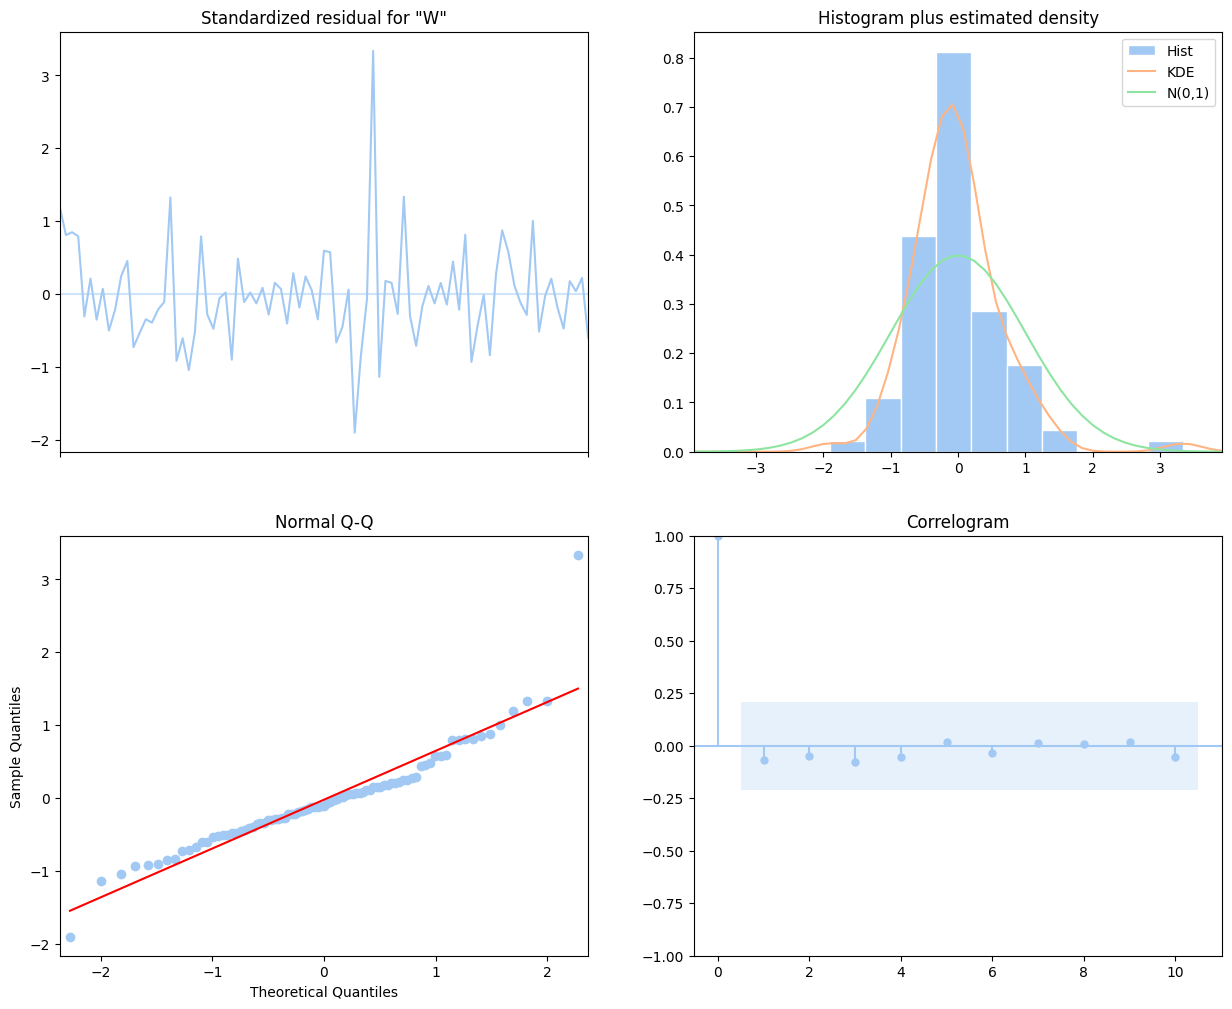

In [233]:
sns.set_palette("pastel")
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [237]:
pred = results.get_prediction(start=0, end=len(sales_22)-1)
pred_ci = pred.conf_int()

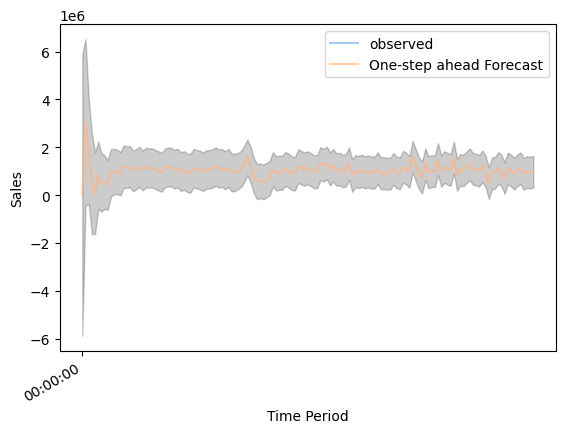

In [238]:
ax = y1['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

In [239]:
y_forecasted = pred.predicted_mean
y_truth = y1['2012-7-27':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is nan


In [247]:
pred_dynamic = results.get_prediction(start=0, end=len(sales_22)-1)

pred_dynamic_ci = pred_dynamic.conf_int()

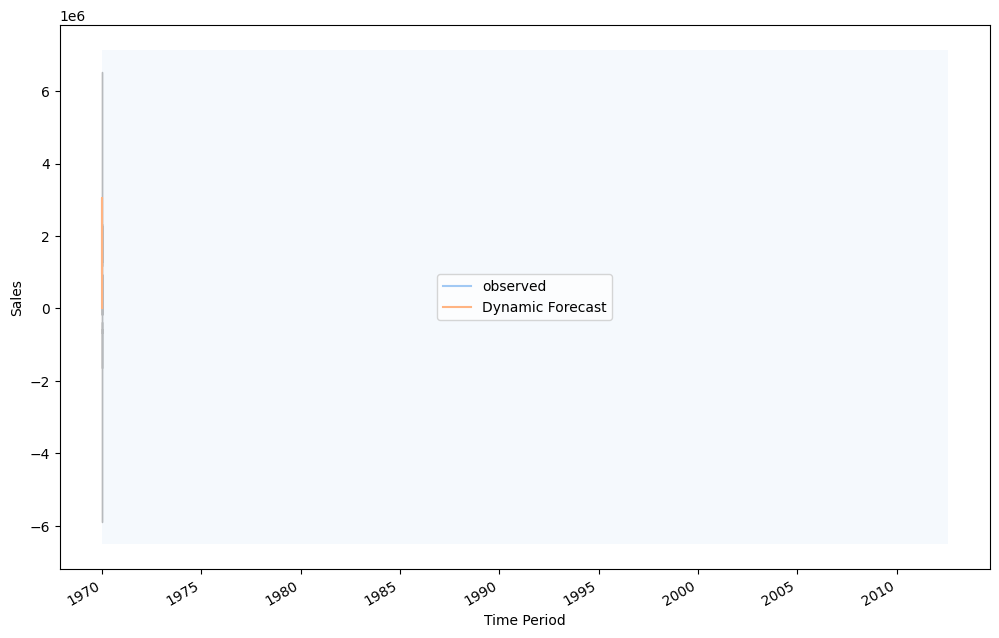

In [248]:
ax = y1['2010':].plot(label='observed', figsize=(12, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2012-7-26'), y1.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

In [249]:
y_forecasted = pred_dynamic.predicted_mean
print(y_forecasted)

1970-01-01 00:00:00.000000000    0.000000e+00
1970-01-01 00:00:00.000000001    3.039378e+06
1970-01-01 00:00:00.000000002    1.834002e+06
1970-01-01 00:00:00.000000003    4.814603e+05
1970-01-01 00:00:00.000000004    8.302976e+04
                                     ...     
1970-01-01 00:00:00.000000138    1.129856e+06
1970-01-01 00:00:00.000000139    8.925322e+05
1970-01-01 00:00:00.000000140    9.683106e+05
1970-01-01 00:00:00.000000141    9.467394e+05
1970-01-01 00:00:00.000000142    9.773192e+05
Freq: ns, Name: predicted_mean, Length: 143, dtype: float64
